In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import pandas as pd
import csv
from scipy import stats

# pour "jeje":
#file="/Users/jeje/Documents/Scolaire/M2/Projet_DFE/doi_10/All_data/data_microMA/dataset_microMA_MutH.csv"
# pour "nana":
file="../doi_10/All_data/data_microMA/dataset_microMA_MutH.csv"

In [3]:
from IPython.display import display, HTML, Video
CSS = """.output {align-items: center;}"""
HTML('<style>{}</style>'.format(CSS))

In [4]:
seuil_detection_fitness=0.005

def analyse_ligne(row): 
    res=[]
    for i in range(int(len(row)/3-1)):
        if(row[3*i+2]!="NA"):
            nouv=float(row[3*i+2].replace(",","."))
            if nouv<seuil_detection_fitness: nouv=0
            res+=[nouv]
        else:
            res+=[-1] # JJ   attention, pb à régler un jour!
    return res

def analyse_fichier(): # ressort [W_t pour tout t] pour le fichier lu
    wt_tot=[]
    wt_cur=[]
    with open("doi_10/All_data/data_microMA/dataset_microMA_MutH.csv", newline='') as csvfile:
        reader=csv.reader(csvfile,delimiter=';')
        nrow=0
        for row in reader:
            if(nrow>=2):
                wt_cur=analyse_ligne(row)
                wt_tot+=[wt_cur]
            nrow+=1
    return wt_tot


In [5]:
wt_real=np.array(analyse_fichier())
wt_real=wt_real[3:,:] # il faut supprimer les deux 1res.
with open('growthR_sim.npy', 'rb') as f:
    wt_sim = np.load(f)
with open('growthR_sim_noisy.npy', 'rb') as f:
    wt_sim_noise = np.load(f)

In [30]:
def normalise(wt_init): # renvoie Wt/W0 pour que toutes les cellules partent du même taux de croissance
    wt=wt_init.copy()
    for i in range(len(wt[0,:])):
        if(wt[0,i]!=0):
            wt[:,i]=wt[:,i]/wt[0,i]
        else:
             wt[:,i]=wt[:,i]*0
    return wt

def normalise2(wt_init,n): # renvoie Wt/moyenne(W0:Wn) pour que toutes les cellules partent presque du même taux de croissance et que ce soit lisse !
    wt=wt_init.copy()
    for i in range(len(wt[0,:])):
        nm=np.mean(wt[0:n,i])
        if(nm!=0):
            wt[:,i]=wt[:,i]/nm
        else:
             wt[:,i]=0
    return wt

In [23]:
xmin=0
xmax=0.14
ymin=0
ymax=250
nbreaks=200

tmax=500

fig, ax = plt.subplots(figsize=(15,5))
line1,line2,=ax.plot([], [], [], [])
line = [line1,line2]
ax.set(xlabel = "Taux de croissance au temps t", ylabel = "Nombre d'individus")
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.close()

def init():
    #ax.set_xlim(xmin,xmax)
    #ax.set_ylim(ymin,ymax)
    ax.grid(True)
    return line,

In [8]:
def get_y(x,growthR_cur,eps): # trouve la hauteur de la barre de l'histogramme correspondant à [x-eps/2,x+eps/2]
    y=[]
    i=0
    j=0
    for x_cur in x:
        while x_cur-growthR_cur[i]>eps/2 and i<len(growthR_cur)-1: i+=1
        while growthR_cur[j]-x_cur<eps/2 and j<len(growthR_cur)-1: j+=1
        y+=[j-i]
    return y

def sort_rows(w): # pour optimiser la construction de l'histogramme
    res=[]
    for row in w:
        res+=[np.sort(row)]
    return res


In [35]:


def update(frame): # met à jour l'affichage
    x=np.linspace(xmin,xmax,nbreaks)
    y_sim=get_y(x,np.sort(growthR_sim[frame]),eps=(xmax-xmin)/nbreaks)
    y_real=get_y(x,np.sort(growthR_real_array[frame]),eps=(xmax-xmin)/nbreaks)
    line1.set_data(x,y_sim)
    line2.set_data(x,y_real)
    titre=""
    titre+="t="+str(int(frame*4/60))+"h"
    titre+="    (frame="+str(frame)+")"
    fig.suptitle(titre,size=20)
    return line,


def visualise(wt1,wt2):
    global growthR_sim, growthR_real_array
    ax.legend(["Processus simulé","Processus observé"])
    growthR_sim=wt1
    growthR_real_array=wt2
    ani = animation.FuncAnimation(fig, update, 
                              frames=range(tmax), 
                              init_func=init, 
                              blit=False, 
                              repeat=False, 
                              interval=10)
    return ani



In [19]:
ani=visualise(wt_sim,wt_real)
HTML(ani.to_html5_video())

In [52]:
xmin=0.5
xmax=1.5
ymin=0
ymax=150
nbreaks=200

tmax=1000

fig, ax = plt.subplots(figsize=(15,5))
line1,line2,=ax.plot([], [], [], [])
line = [line1,line2]
ax.set(xlabel = "Taux de croissance au temps t", ylabel = "Nombre d'individus")
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.close()

def init():
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.grid(True)
    return line,

tmax=10
wt_sim_norm=normalise2(wt_sim,1)
#wt_sim_nnorm=normalise(wt_sim_noise)
wt_real_norm=normalise2(wt_real,1)
ani=visualise(wt_sim_norm,wt_real_norm)
HTML(ani.to_html5_video())

(array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  3.,  0.,  1.,  3.,  4.,
         5.,  3.,  4.,  5.,  2.,  4.,  8.,  7.,  4.,  5., 11., 19.,  7.,
        19., 20., 15., 23., 24., 21., 16., 33., 22., 26., 34., 49., 44.,
        41., 38., 53., 44., 41., 43., 39., 27., 40., 35., 49., 42., 32.,
        28., 21., 25., 39., 20., 24., 25., 25., 22., 20., 16., 10., 17.,
        11., 15., 14.,  5.,  9., 11.,  6.,  3.,  6., 10.,  8.,  7.,  5.,
         4.,  2.,  5.,  2.,  1.,  4.,  3.,  2.,  0.,  3.,  1.,  1.,  1.,
         0.,  4.,  0.,  0.,  2.,  0.,  2.,  1.,  1.]),
 array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
        0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
        0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
        0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
        1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.

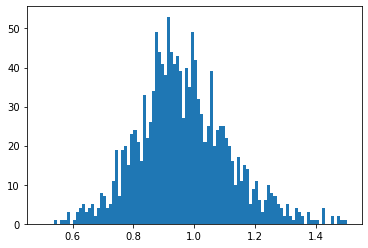

In [82]:
#x=np.linspace(xmin,xmax,nbreaks)
#y=get_y(x,np.sort(wt_real[3]),eps=(xmax-xmin)/nbreaks)
#plt.plot(x,y)
plt.hist(wt_real_norm[10],range=(0.5,1.5),bins=100)